# LeNet5 on MNIST

In [1]:
%run '00_README.ipynb'

Imported helper functions from 00_README.ipynb
Imported all modules.
	Tensorflow Version:  2.2.0
	Numpy Version:  1.19.0
	Pandas Version:  1.0.5


## Building LeNet 5

![LeNet5 Architecutr](https://miro.medium.com/max/1400/0*H9_eGAtkQXJXtkoK)

### Getting MNIST dataset

training data x shape: (60000, 28, 28, 1)
training data y shape: (60000,)
training data y shape with categories: (60000, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


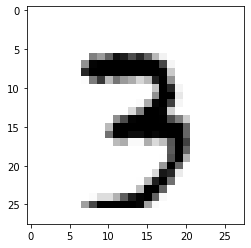

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

print("training data x shape:", x_train.shape)
print("training data y shape:", y_train.shape)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print("training data y shape with categories:", y_train.shape)

plt.imshow(x_train[2917].squeeze(), cmap=plt.cm.gray_r)
print(y_train[2917])

In [3]:
%matplotlib widget

sns.set(context='paper', style="ticks", color_codes=True, font='Times New Roman', font_scale=1, rc={"axes.grid": True })
sns.set_palette("muted")

plt.figure(figsize=(10,5))
for i in range(10):
    #plt.style.use(['dark_background'])
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].squeeze(), cmap=plt.cm.gray_r)
    #plt.xlabel(y_train[i][0])
plt.show()


plt.savefig('MNIST_examples.pdf')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Exploring the data
#### Normalize dataset

In [4]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

print("training data shape:", x_train_normalized.shape)
print("test data shape:", x_test_normalized.shape)

training data shape: (60000, 28, 28, 1)
test data shape: (10000, 28, 28, 1)


LeNet accepts 32x32, mnist is 28x28. Adding zero pads:

In [5]:
# zero padding accross the 'images', 2,2 accross the x-axis, 2,2 accross the y-axis
x_train_normalized = np.pad(x_train_normalized, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_test_normalized = np.pad(x_test_normalized, ((0,0),(2,2),(2,2),(0,0)), 'constant')

print("training data shape:", x_train_normalized.shape)
print("test data shape:", x_test_normalized.shape)

plt.imshow(x_train[2917].squeeze(), cmap=plt.cm.gray_r)

training data shape: (60000, 32, 32, 1)
test data shape: (10000, 32, 32, 1)


#### Set input and output length for later

In [6]:
INPUT_LENGTH = x_test_normalized[1].flatten().shape[0]
OUTPUT_LENGTH = 10

### Create the model
*this can be skipped if the model file is already available*

In [24]:
def create_model(my_learning_rate):
    
    model = tf.keras.models.Sequential()
    
    model.add(layers.Conv2D(filters=7, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
    model.add(layers.AveragePooling2D())
    
    model.add(layers.Conv2D(filters=17, kernel_size=(5, 5), activation='relu'))
    model.add(layers.AveragePooling2D())
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(units=121, activation='relu'))
    
    model.add(layers.Dense(units=81, activation='relu'))
    
    model.add(layers.Dense(units=10, activation='softmax'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                 loss="categorical_crossentropy",
                 metrics=['accuracy'])
    
    model.summary()
    
    return model

In [25]:
def train_model(model, train_features, train_label, epochs,
               batch_size=None, validation_split=0.1):
    
    history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                       epochs=epochs, shuffle=True,
                       validation_split=validation_split)
    
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    
    return epochs, hist

#### Invoke the previous functions to build & train model.

In [26]:
batch_size = 4000
learning_rate = 0.003
epochs = 50
validation_split = 0.1



print("shape of x_train: ", x_train_normalized.shape)

tf_model = create_model(learning_rate)

epochs, hist = train_model(tf_model, x_train_normalized, y_train,
                          epochs, batch_size, validation_split)


metrics_to_plot = ['accuracy']
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Value')

for metric in metrics_to_plot:
    x = hist[metric]
    plt.plot(epochs[1:], x[1:], label=metric)
    
plt.legend()

shape of x_train:  (60000, 32, 32, 1)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 7)         182       
_________________________________________________________________
average_pooling2d_10 (Averag (None, 14, 14, 7)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 17)        2992      
_________________________________________________________________
average_pooling2d_11 (Averag (None, 5, 5, 17)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 425)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 121)               51546     
_________________________________________________________________
dense_16 (Dense)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Save the model

In [27]:
tf_model.save('./keras-model/01aW_LeNet-MNIST.h5')

### Load the model
*continue here if you want to load a pretrained model*

In [16]:
tf_model_file = './keras-model/01a_Orginial-LeNet-MNIST.h5'
tf_model = tf.keras.models.load_model(tf_model_file)
tf_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 80)               